In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
data = pd.read_csv('/content/diabetes.csv')

In [3]:
data.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Trying to understand the data and performing necessary changes.

* Pregnancies: Number of times pregnant.
* Glucose: Plasma glucose concentration from an oral glucose tolerance test.
* BloodPressure: Diastolic blood pressure (mm Hg).
* SkinThickness: Triceps skin fold thickness (mm).
* Insulin: 2-hour serum insulin (mu U/ml).
* BMI: Body mass index (kg/m²).
* DiabetesPedigreeFunction: A measure of diabetes genetic risk.
* Age: Patient age.
* Outcome: Target variable (1 for diabetes, 0 otherwise).

In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

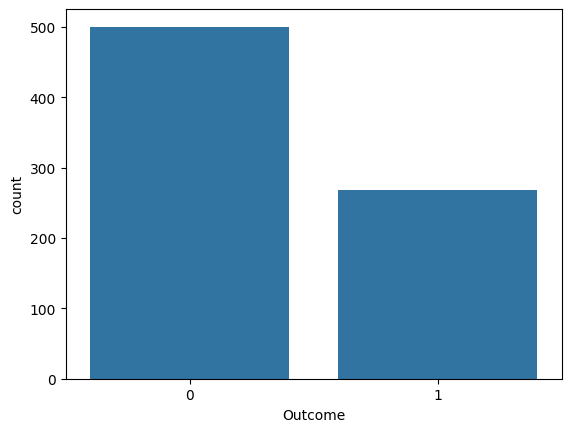

In [8]:
sns.countplot(x='Outcome',data=data)

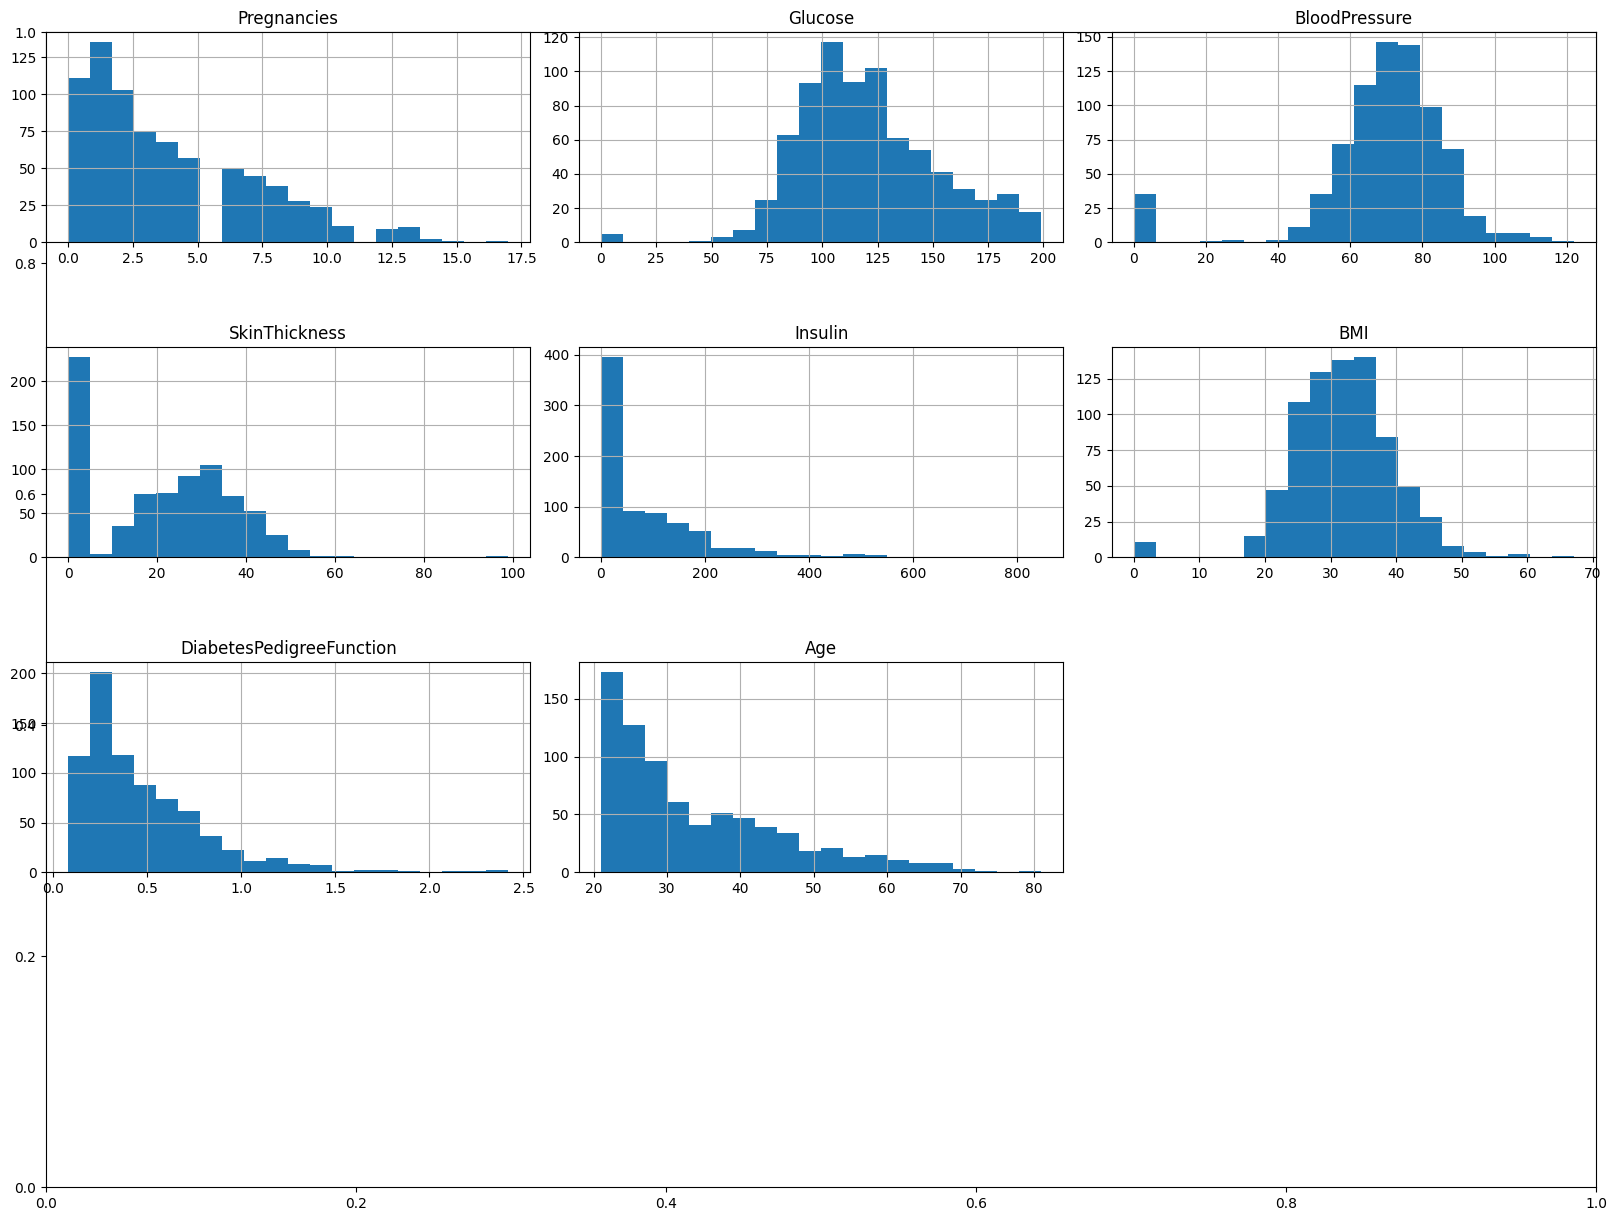

In [9]:
# Histogram of each feature
import itertools

col = data.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length//2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    data[i].hist(bins = 20)
    plt.title(i)
plt.show()

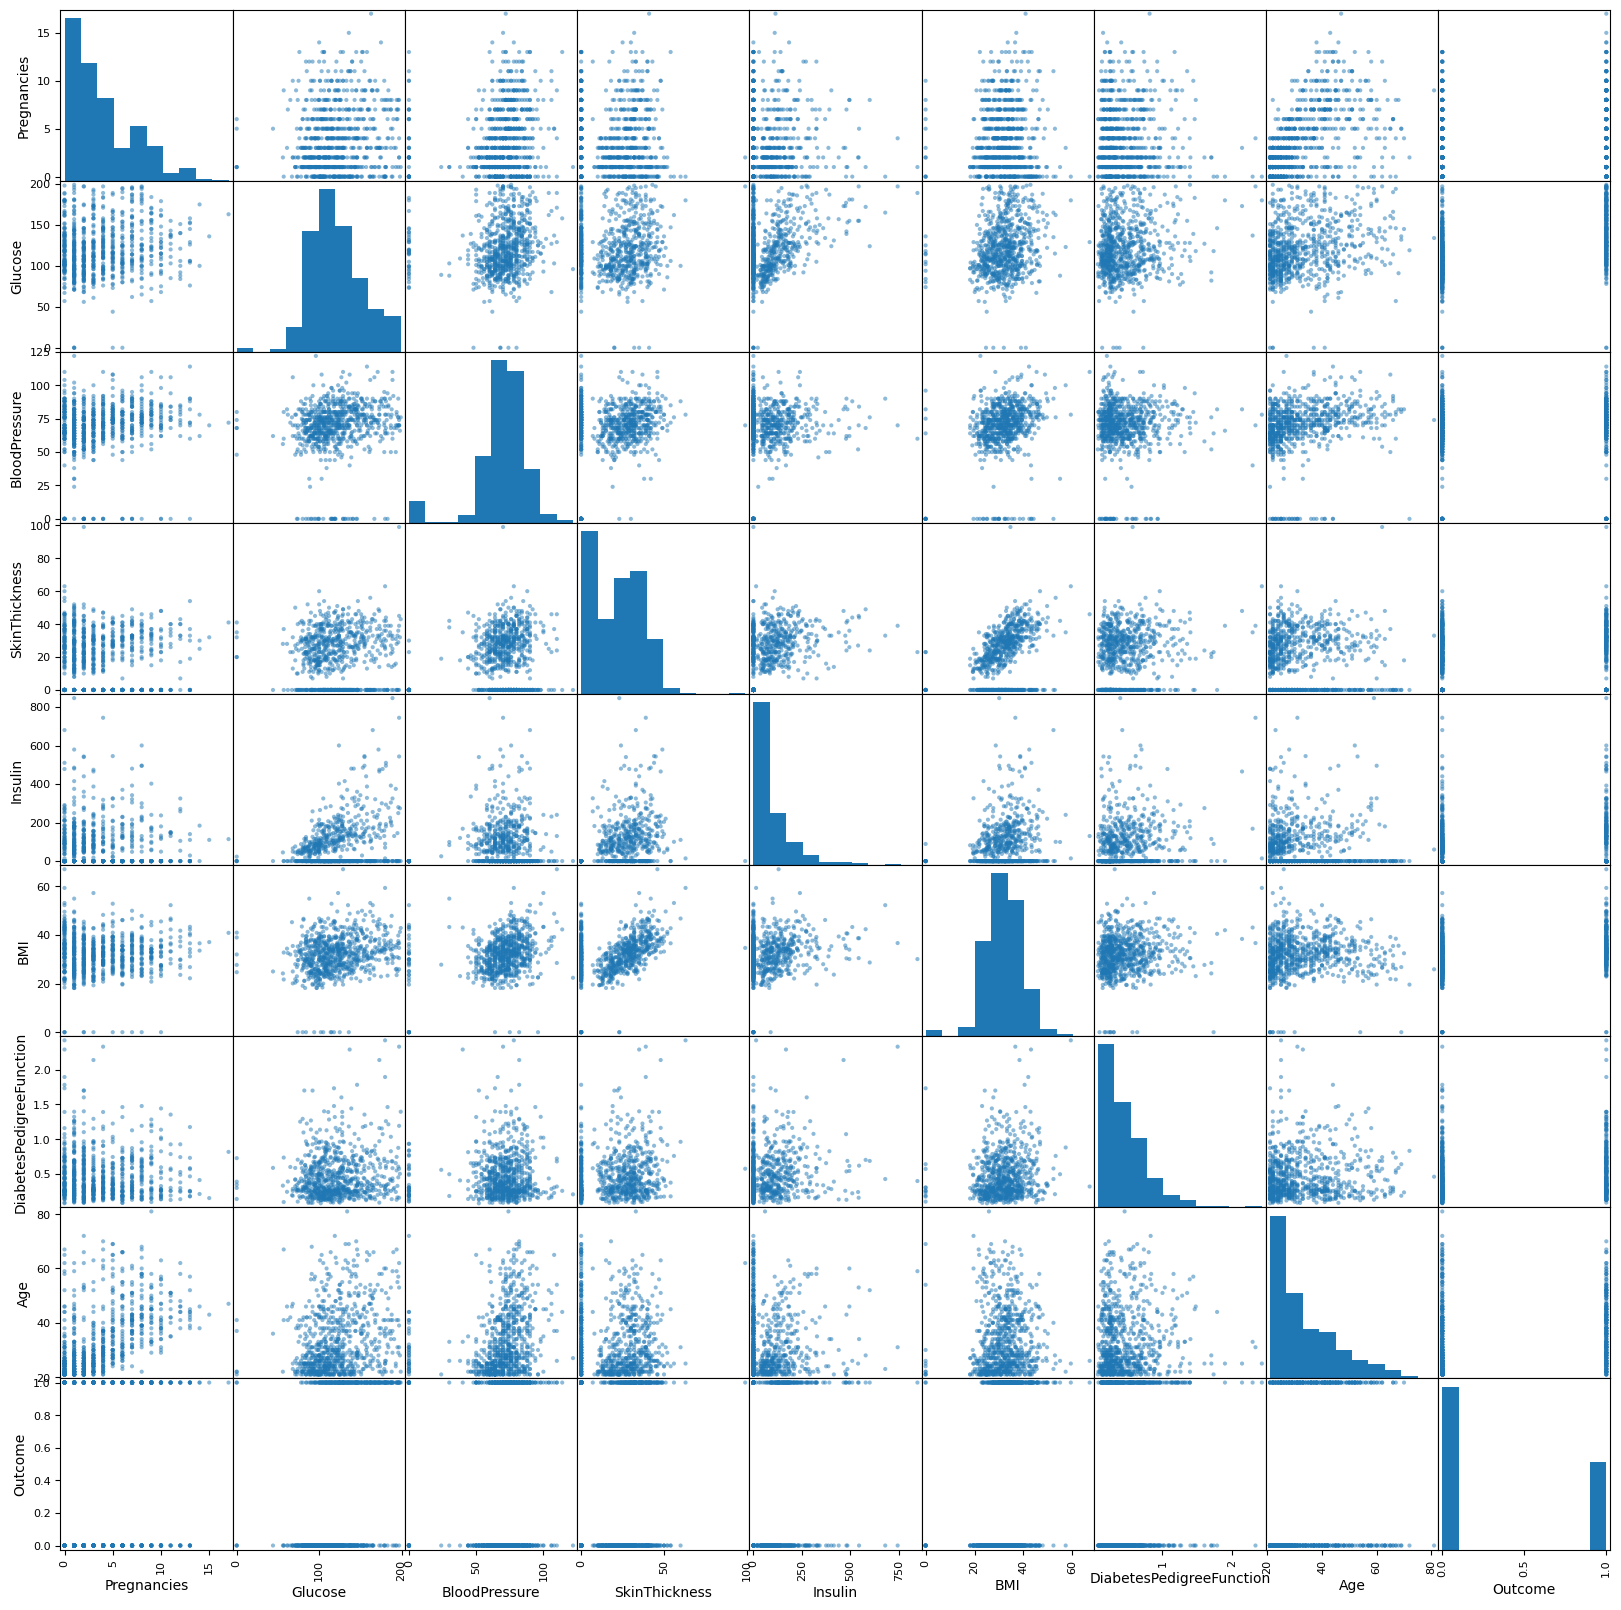

In [10]:
# Scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize = (20, 20));

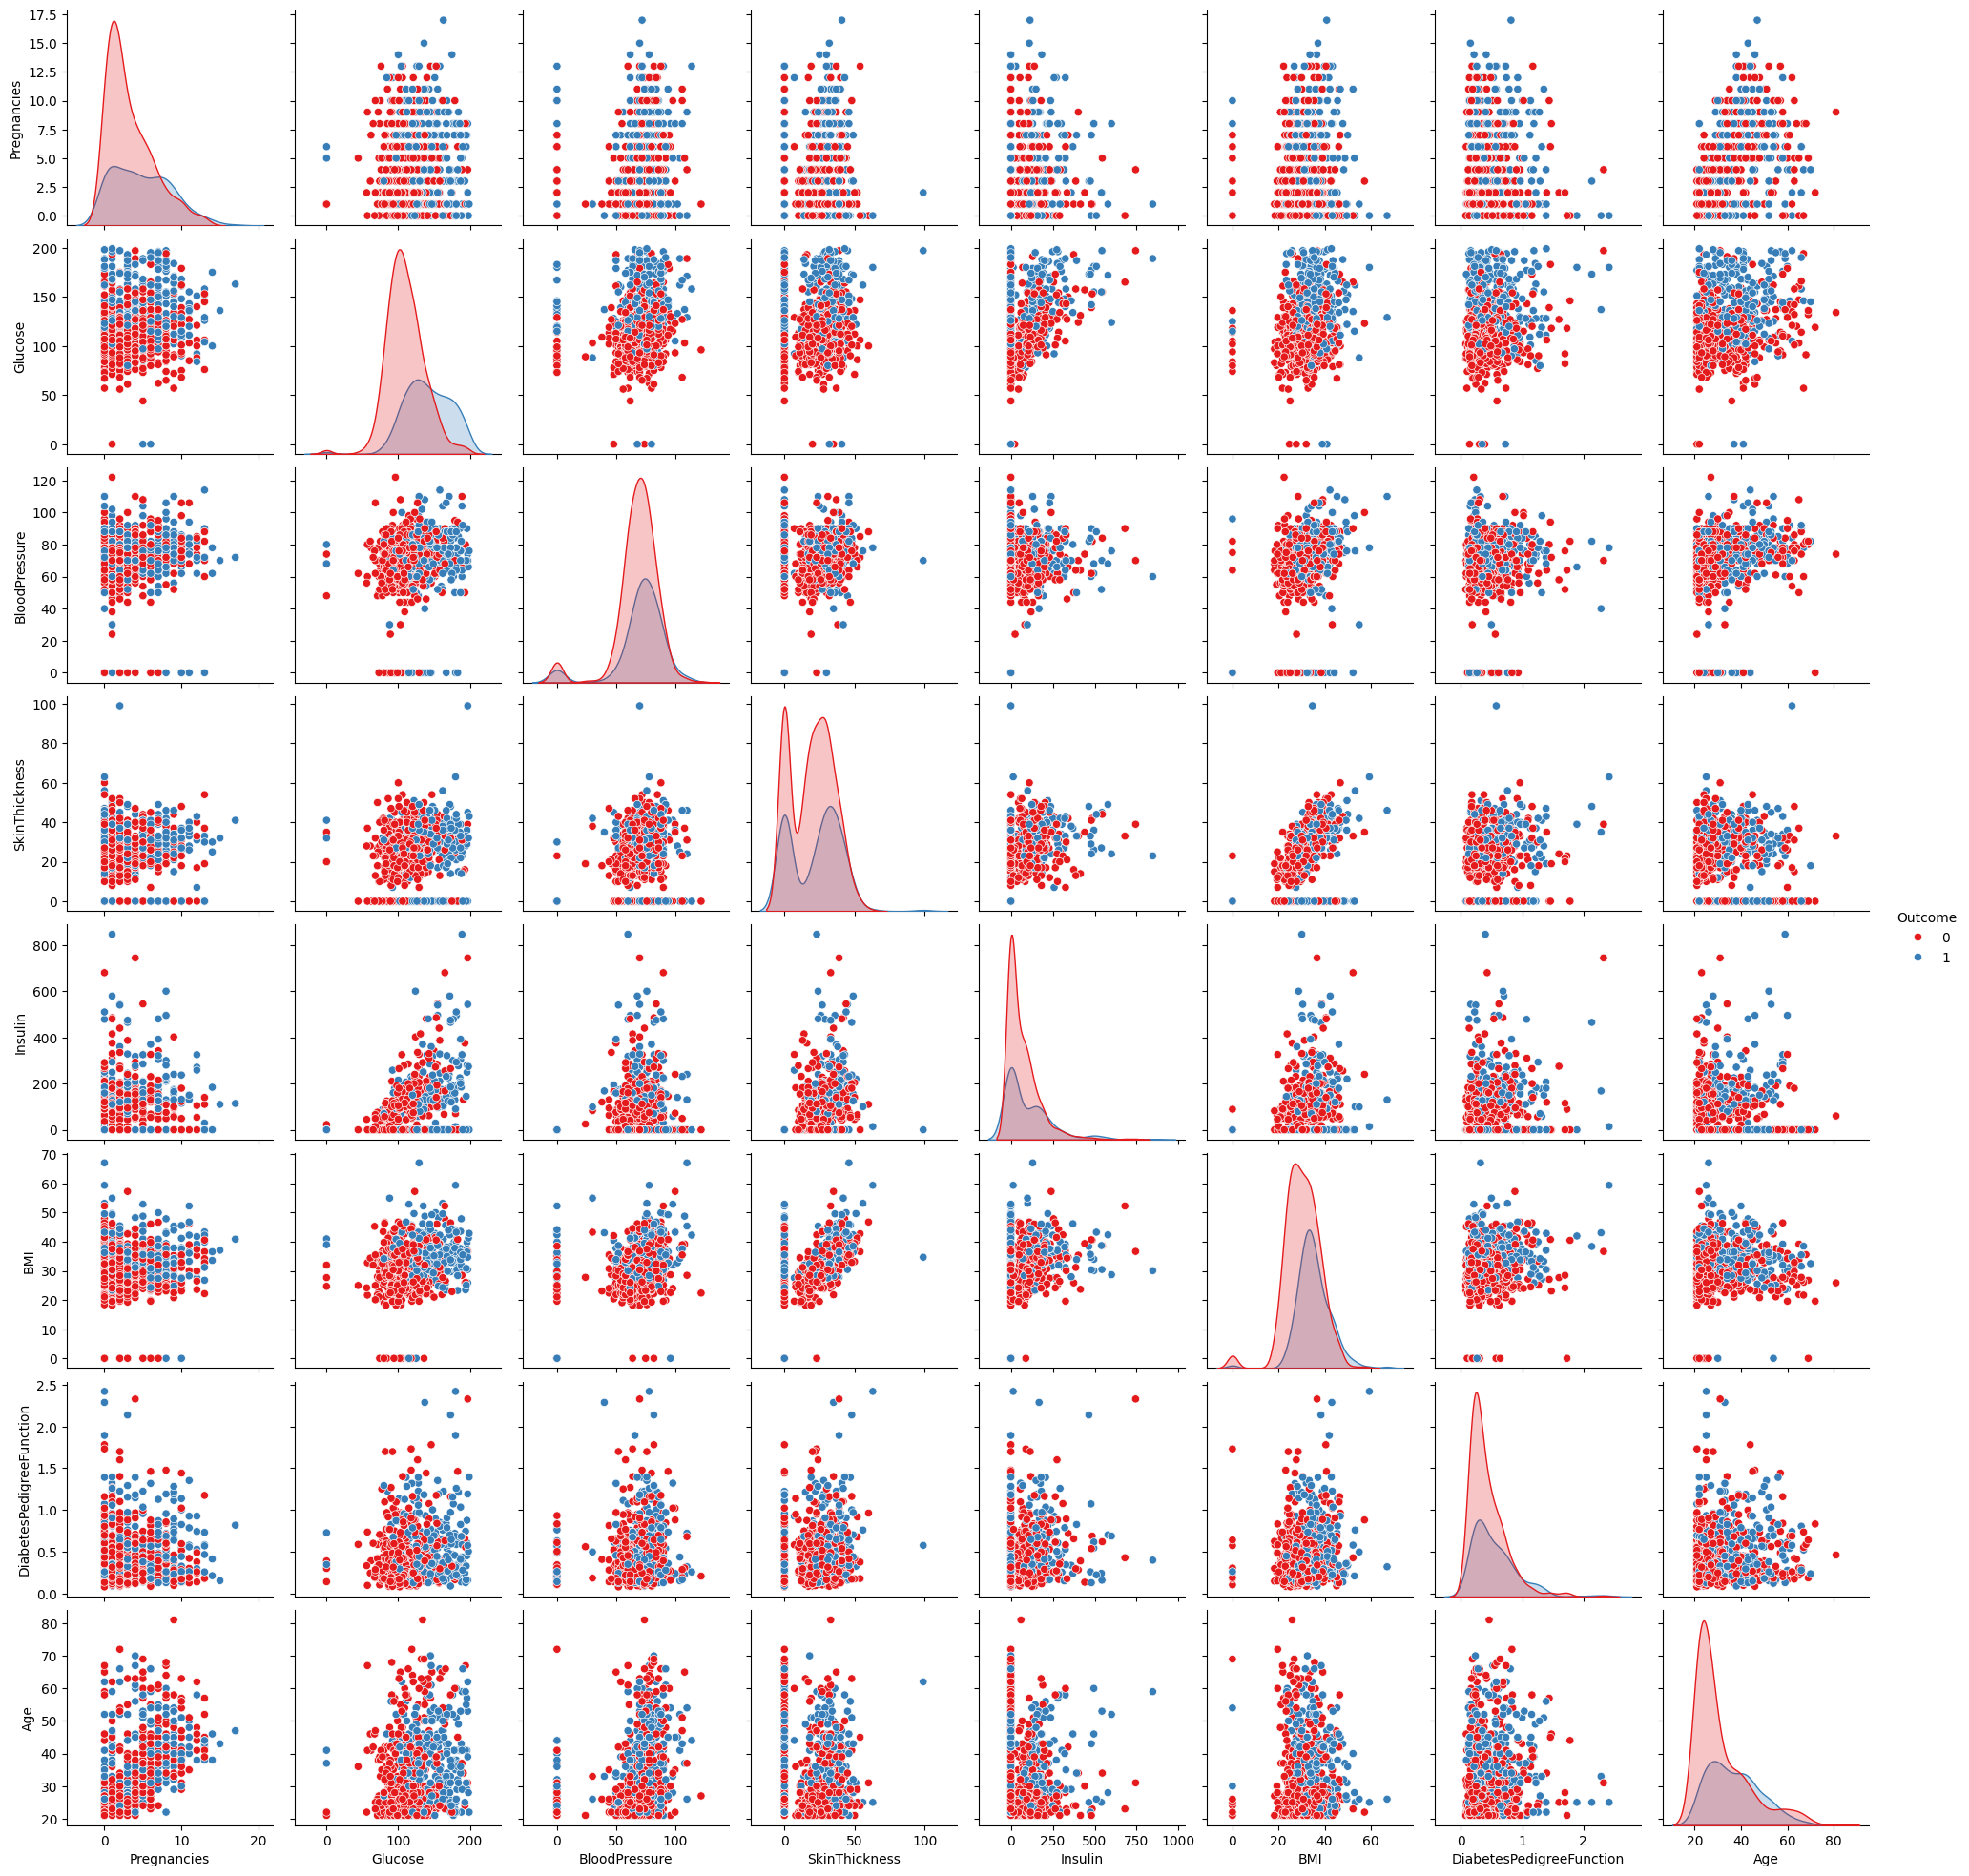

In [11]:
#paiplot
pairplot = sns.pairplot(data, hue = 'Outcome', diag_kind = 'kde', palette='Set1')
pairplot._legend.set_title("Outcome")
plt.show()

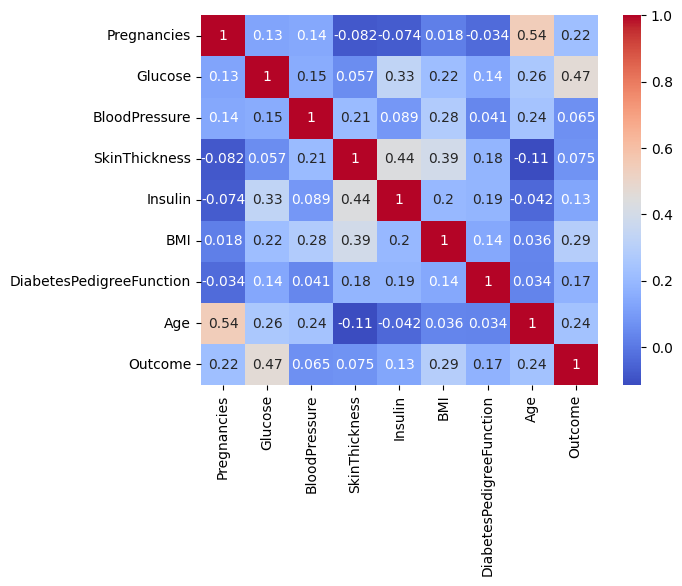

In [12]:
#Heatmap

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [13]:
#Writing a loop to identify any 0's in data

for i in col:
    c = 0
    for x in (data[i]):
        if x == 0:
            c = c + 1
    print(i,c)

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0


**We can have data with pregnancies as 0 but other than that no values cant be zero**

In [14]:
variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in variables:
    data[i].replace(0,data[i].mean(),inplace=True)

In [15]:
for i in col:
    c = 0
    for x in (data[i]):
        if x == 0:
            c = c + 1
    print(i,c)

Pregnancies 111
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0
DiabetesPedigreeFunction 0
Age 0


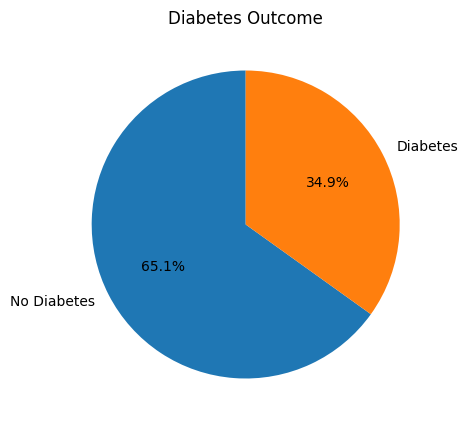

In [16]:
plt.figure(figsize=(5,5))
plt.pie(data['Outcome'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Diabetes Outcome')
plt.show()

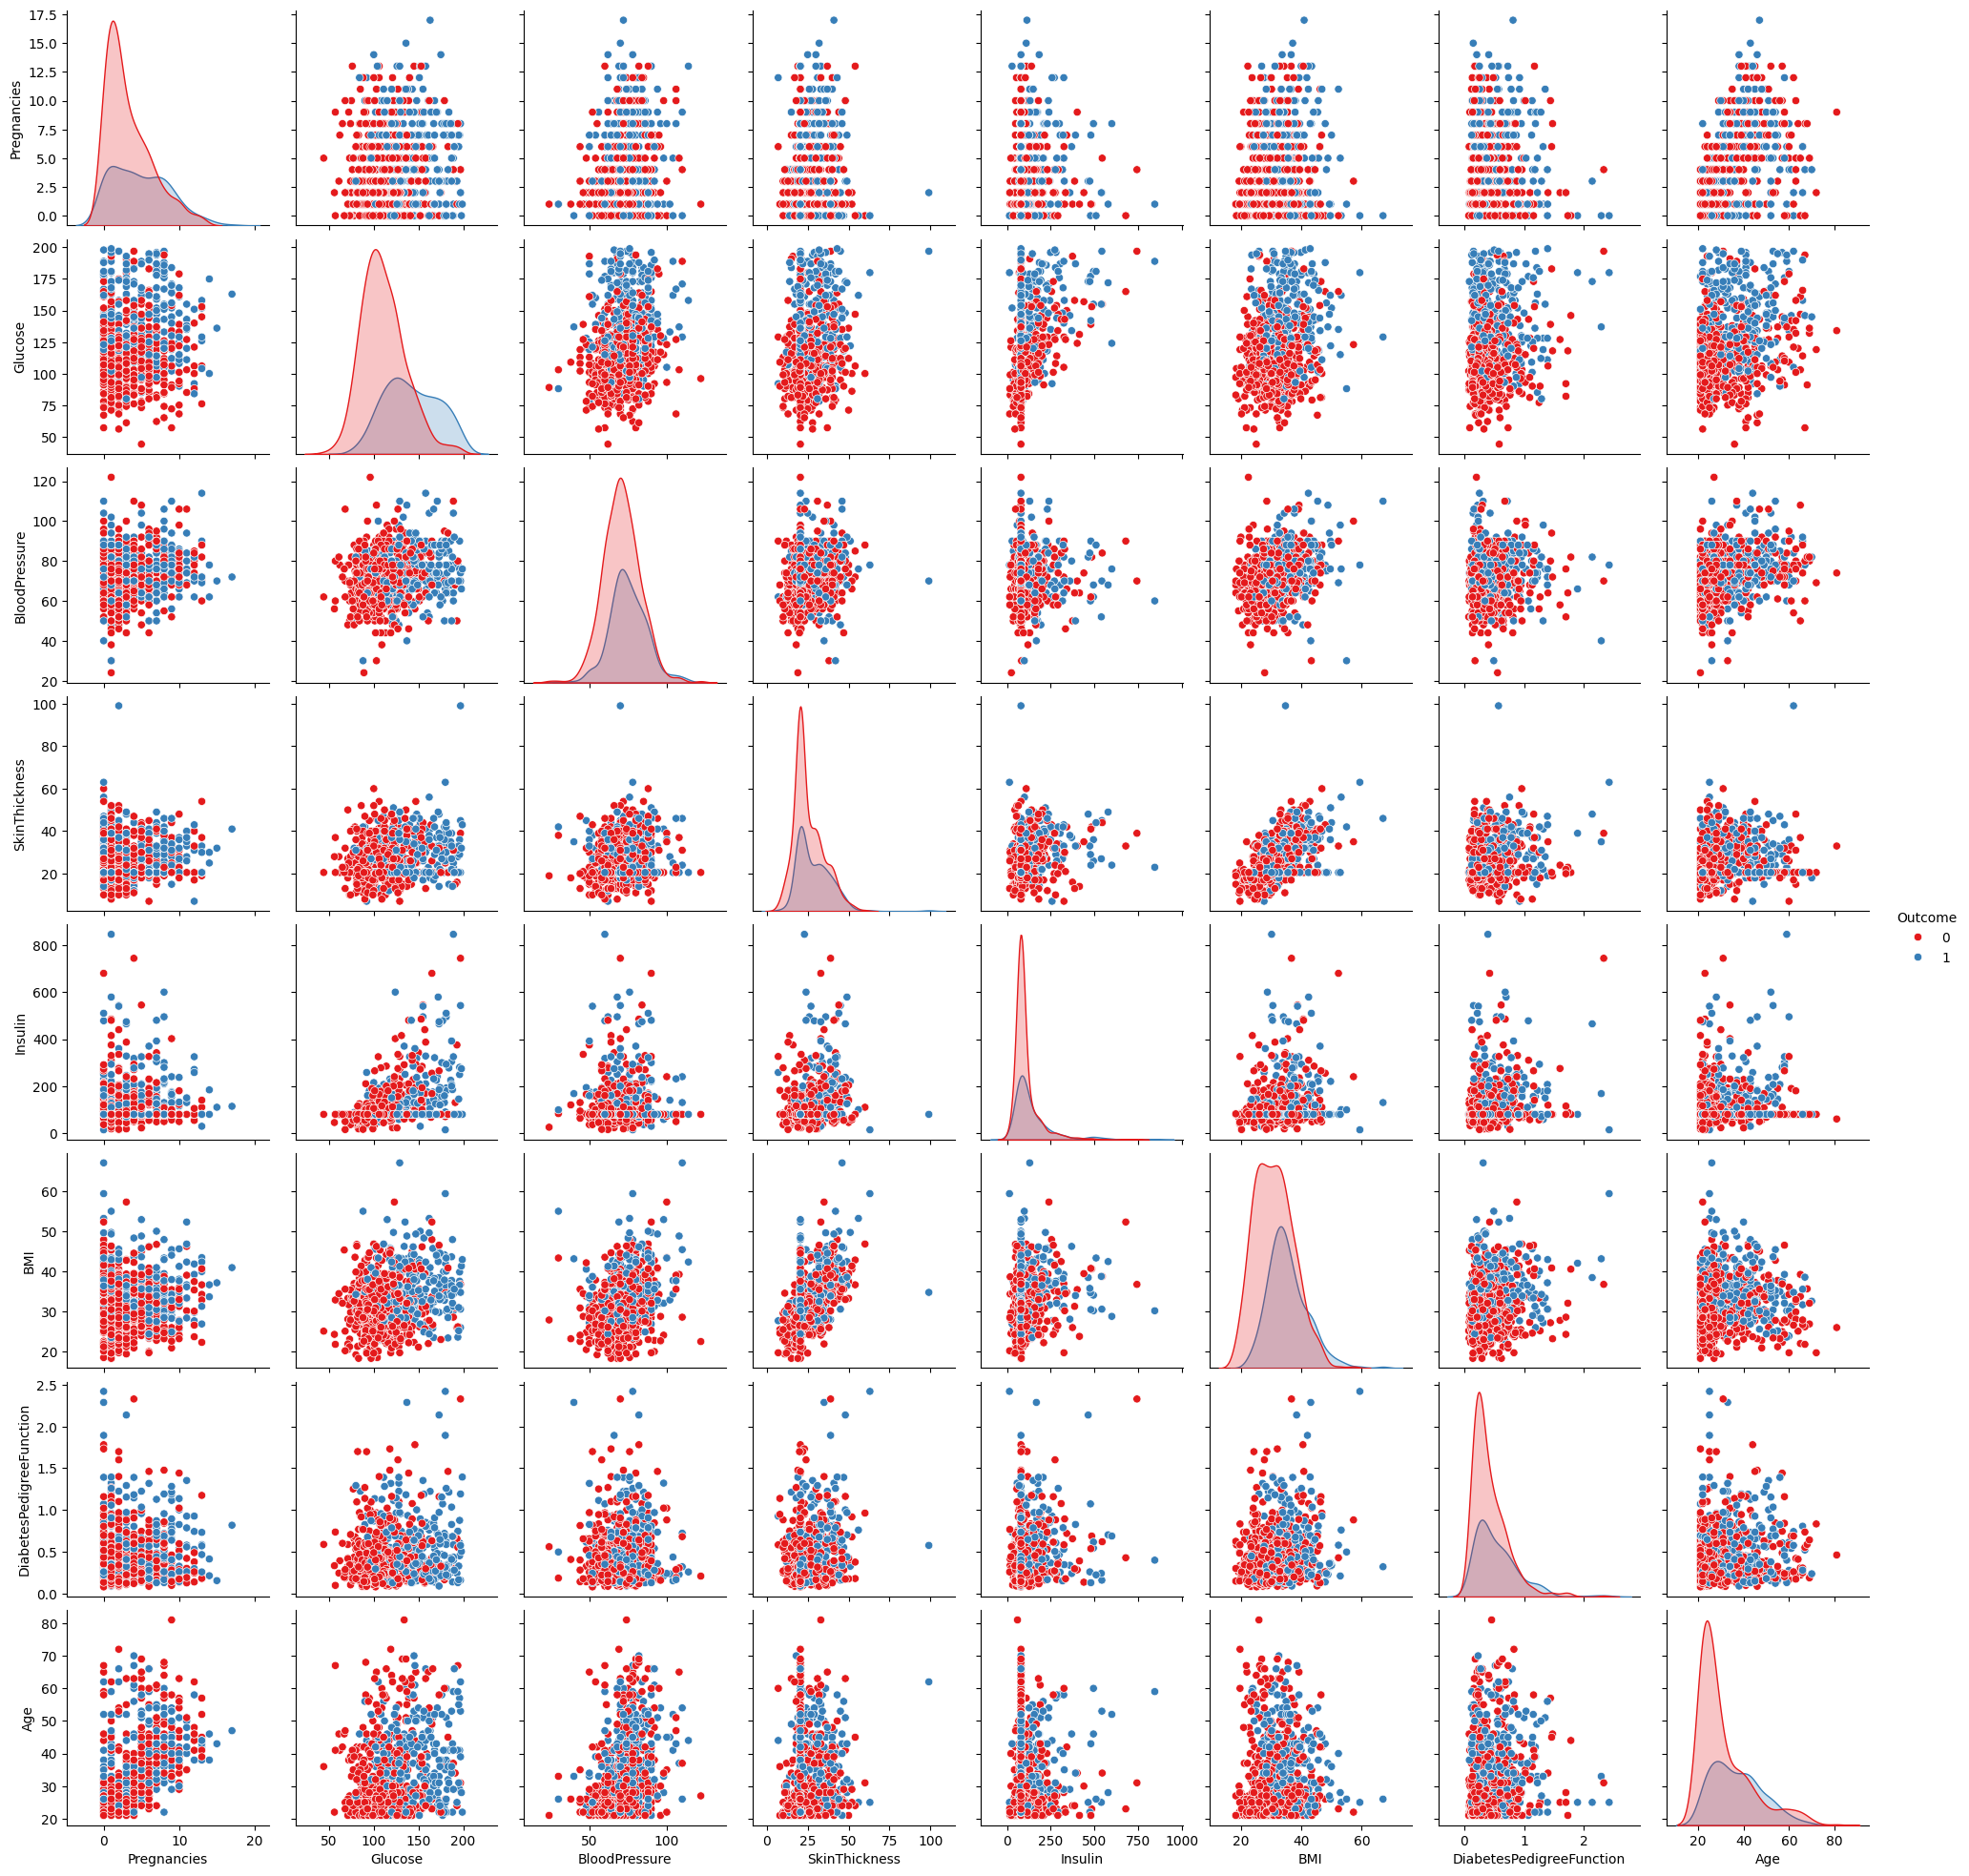

In [17]:
#paiplot after adjusting the data
pairplot = sns.pairplot(data, hue = 'Outcome', diag_kind = 'kde', palette='Set1')
pairplot._legend.set_title("Outcome")
plt.show()

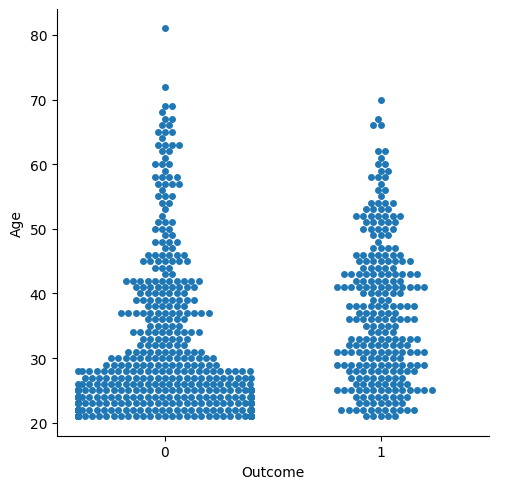

In [18]:
sns.catplot(x='Outcome',y='Age',data=data,kind='swarm')

From the above observation 20 - 30 age category people are affected or not affected by diabetics. Patients in the age range 40-55 years are more prone to diabetes, as compared to other age groups.

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

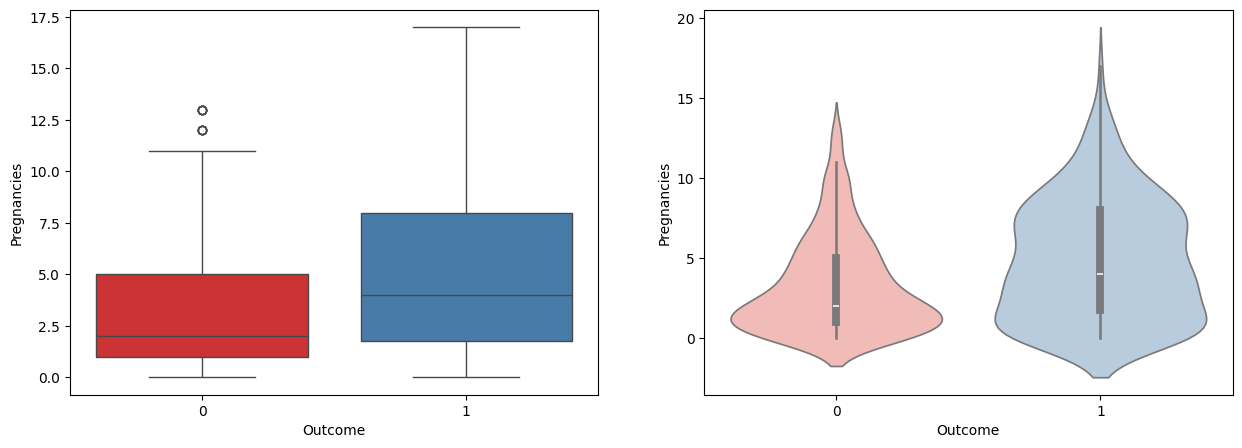

In [19]:
#comparision between pregnancy and diabetics

fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='Pregnancies',data=data,ax=ax[0], palette= 'Set1')
sns.violinplot(x='Outcome',y='Pregnancies',data=data,ax=ax[1], palette= 'Pastel1')

Fromm the above data plot we can clearly see that diabeties is also determined on how many times they are getting pregnant. The more they get pregnant the higher the chance of getting diabeties.

<Axes: xlabel='Outcome', ylabel='Glucose'>

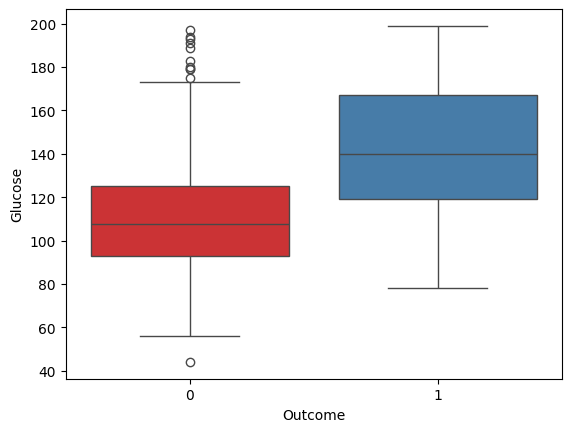

In [20]:
#complarision between glucose and outcome

sns.boxplot(x='Outcome',y='Glucose',data=data,palette='Set1')

From the above data plot we can clearly see that when the glucose level shoots up the higher the chance of getting diabeties.

In [21]:
#getting the count of the patienst who has no diabeties but still their glucose level is more than 120

count = 0
for index, row in data.iterrows():
  if row['Outcome'] == 0 and row['Glucose'] > 120:
    count += 1
print(count)

157


<Axes: xlabel='Outcome', ylabel='BloodPressure'>

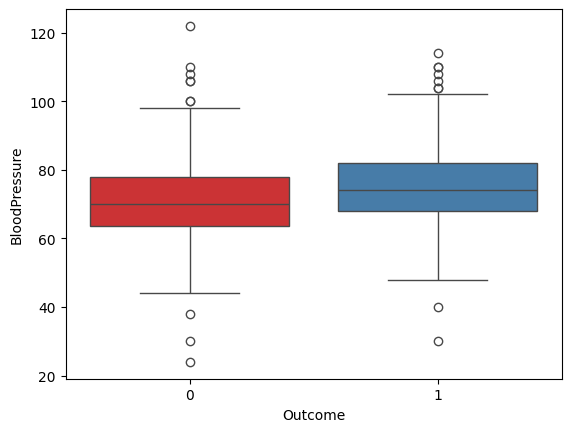

In [22]:
sns.boxplot(x='Outcome',y='BloodPressure',data=data,palette='Set1')

<Axes: xlabel='Outcome', ylabel='Insulin'>

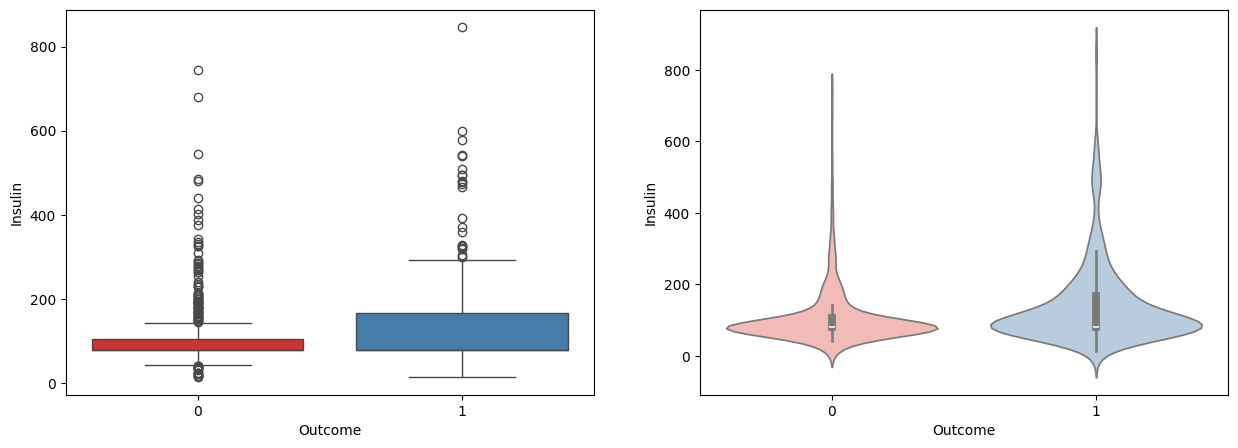

In [23]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='Insulin',ax = ax[0], data=data,palette='Set1')
sns.violinplot(x='Outcome',y='Insulin', ax = ax[1], data=data,palette='Pastel1')

In [24]:
count = 0
for index, row in data.iterrows():
  if row['Outcome'] == 0 and row['Insulin'] <= 5:
    count += 1
print(count)

0


In [25]:
data['Insulin'].describe()

count    768.000000
mean     118.660163
std       93.080358
min       14.000000
25%       79.799479
50%       79.799479
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [26]:
def seperate_insulin_data(data):
  insulin_data = data[data['Outcome'] == 0]['Insulin']
  return insulin_data

insulin_data_outcome_0 = seperate_insulin_data(data)

insulin_data_outcome_0.head()

1     79.799479
3     94.000000
5     79.799479
7     79.799479
10    79.799479
Name: Insulin, dtype: float64

In [27]:
count = 0
for i in insulin_data_outcome_0:
  if i > 150:
    count += 1
print(count)

74


In [28]:
def data_outcome_0(data):
  data1 = data[data['Outcome'] == 0]
  return data1

data1 = data_outcome_0(data)

In [29]:
data1.head()

Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
1             1     85.0      66.000000      29.000000  79.799479  26.6   
3             1     89.0      66.000000      23.000000  94.000000  28.1   
5             5    116.0      74.000000      20.536458  79.799479  25.6   
7            10    115.0      69.105469      20.536458  79.799479  35.3   
10            4    110.0      92.000000      20.536458  79.799479  37.6   

    DiabetesPedigreeFunction  Age  Outcome  
1                      0.351   31        0  
3                      0.167   21        0  
5                      0.201   30        0  
7                      0.134   29        0  
10                     0.191   30        0

In [30]:
count = 0
for i, j in zip(data1['Insulin'], data1['Glucose']):
  if i > 120 and j > 140:
    count += 1
    print(f'Insulin:{i}, Glucose:{j}')
print('Patients count whose insuline level is more than 120 and Glucose level 140: ',count)

Insulin:342.0, Glucose:150.0
Insulin:128.0, Glucose:141.0
Insulin:228.0, Glucose:144.0
Insulin:140.0, Glucose:144.0
Insulin:284.0, Glucose:154.0
Insulin:485.0, Glucose:153.0
Insulin:190.0, Glucose:142.0
Insulin:744.0, Glucose:197.0
Insulin:194.0, Glucose:146.0
Insulin:680.0, Glucose:165.0
Insulin:375.0, Glucose:193.0
Insulin:130.0, Glucose:191.0
Insulin:545.0, Glucose:155.0
Insulin:168.0, Glucose:157.0
Insulin:255.0, Glucose:165.0
Insulin:293.0, Glucose:147.0
Insulin:310.0, Glucose:143.0
Insulin:140.0, Glucose:154.0
Insulin:265.0, Glucose:173.0
Insulin:193.0, Glucose:154.0
Insulin:126.0, Glucose:154.0
Insulin:330.0, Glucose:143.0
Insulin:272.0, Glucose:152.0
Insulin:440.0, Glucose:157.0
Insulin:168.0, Glucose:165.0
Insulin:387.0, Glucose:158.0
Insulin:140.0, Glucose:153.0
Patients count whose insuline level is more than 120 and Glucose level 140:  27


**Here we can clearly see about 27 patients whose insulin level is more than 120 and Gluscose level of 140 is still not a diabetic patient**

<Axes: xlabel='Outcome', ylabel='BMI'>

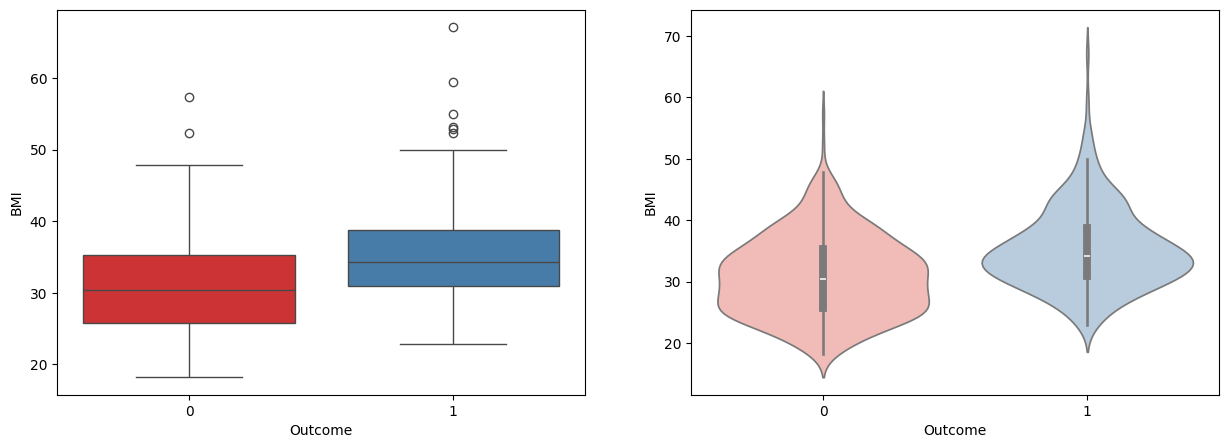

In [31]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='BMI', ax=ax[0], data=data,palette='Set1')
sns.violinplot(x='Outcome',y='BMI', ax=ax[1], data=data,palette='Pastel1')

Both graphs highlights the role of BMI in diabetes prediction. Non diabetic patients have a normal BMI within the range of 25-35 whereas the diabetic patients have a BMI greater than 35. The violinplot reveals the BMI distribution, where the non dibetic patients have a increased spread from 25 to 35 with narrows after 35. However in diabetic patients there is increased spread at 35 and increased spread 45-50 as compared to non diabetic patients.Therefore BMI is a good predictor of diabetes and obese people are more likely to be diabetic.

Text(0.5, 1.0, 'Correlation Heatmap')

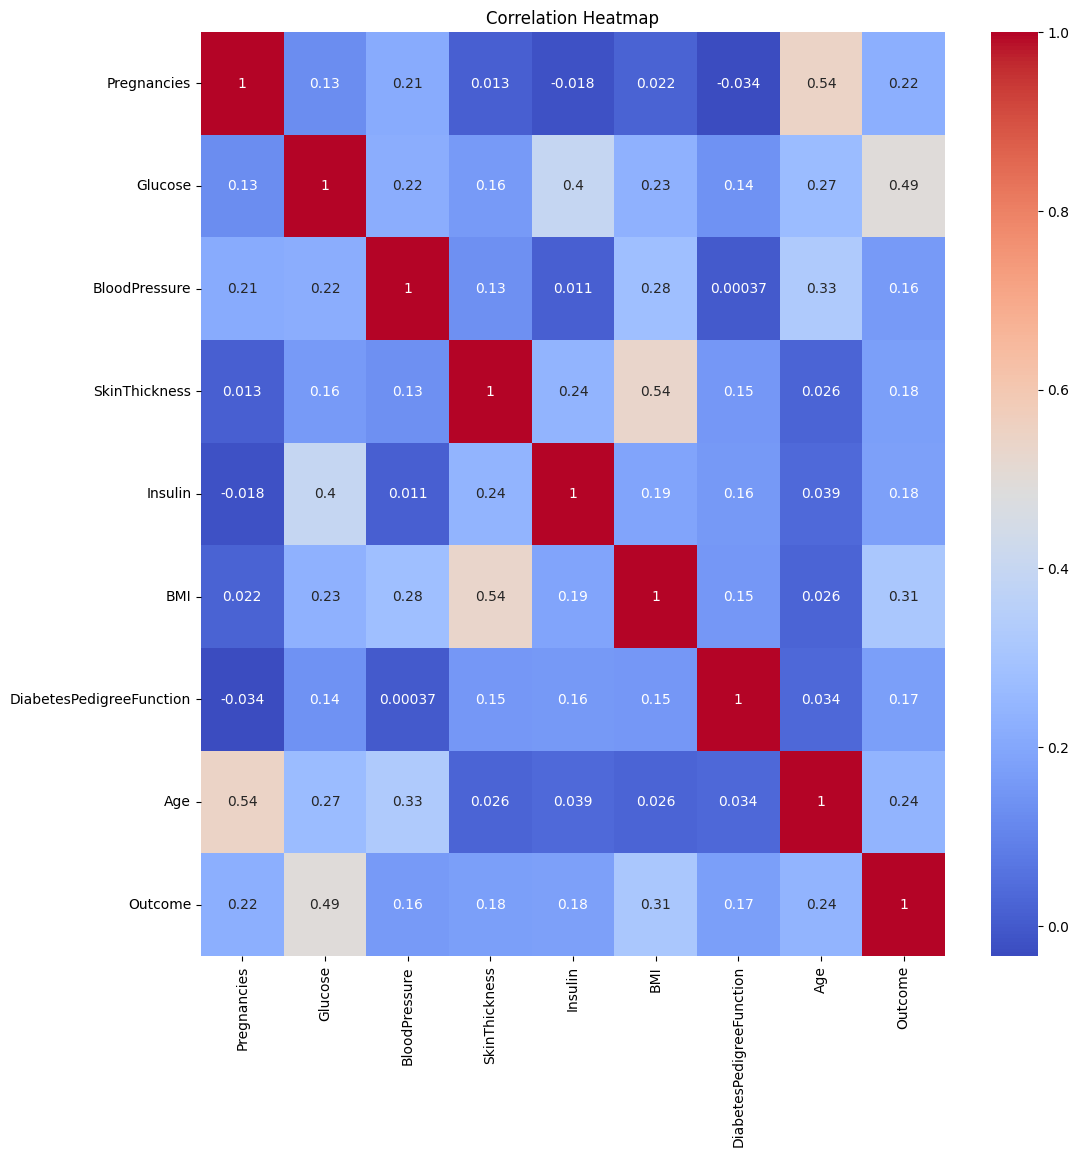

In [32]:
#correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm').set_title('Correlation Heatmap')

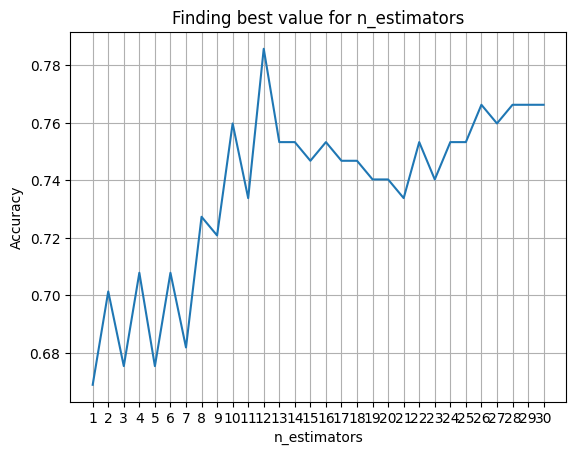

Highest value:  0.7857142857142857


In [56]:
#plotting graph for nearest neighbour

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)
for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = pd.concat([acc, pd.Series([metrics.accuracy_score(prediction, Y_test)])])
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(data.drop('Outcome', axis=1), data['Outcome'])

**Splitting Data to Train and Test**

**Diabetic Prediction**
We are using the following models in our code

* KNN
* Logistic Regression
* Random Forest Classification
* Support Vector Machine

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'], test_size=0.2, random_state=42)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=24, metric= 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

**Logistic regression**

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [35]:
#training the model

lr.fit(X_train, Y_train)

LogisticRegression()

In [36]:
lr.score(X_train, Y_train)

0.7719869706840391

**2) Random Forest Classification**

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,random_state=42)

In [41]:
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [42]:
rf.score(X_train, Y_train)

1.0

In [45]:
rf_pred = rf.predict(X_test)

**Support Machine Vector**

In [47]:
#building SVM model

from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)
svm

SVC(kernel='linear', random_state=42)

In [48]:
#training the model
svm.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [51]:
#score of train
svm.score(X_train, Y_train)

0.7719869706840391

**Naive Bayes**

In [59]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [60]:
#training the model

nb.fit(X_train, Y_train)

GaussianNB()

In [61]:
#Score of the model

nb.score(X_train, Y_train)

0.741042345276873

**Decision Tree**

In [62]:
from sklearn.tree import DecisionTreeClassifier
deci_tree = DecisionTreeClassifier(criterion = 'entropy',random_state=42)

In [63]:
#training the model

deci_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [64]:
#Score of the model

deci_tree.score(X_train, Y_train)

1.0

In [68]:
#Making predictions on the dataset

Y_pred_knn = knn.predict(X_test)
Y_pred_lr = lr.predict(X_test)
Y_pred_rf = rf.predict(X_test)
Y_pred_svm = svm.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_decitree = deci_tree.predict(X_test)

**Model Evaluation**

In [69]:
from sklearn.metrics import accuracy_score

acc_logreg = accuracy_score(Y_test, Y_pred_lr)
acc_knn = accuracy_score(Y_test, Y_pred_knn)
acc_rf = accuracy_score(Y_test, Y_pred_rf)
acc_svm = accuracy_score(Y_test, Y_pred_svm)
acc_nb = accuracy_score(Y_test, Y_pred_nb)
acc_decitree = accuracy_score(Y_test, Y_pred_decitree)

In [72]:
#Accuracy on test performed

print('Logistic Regression: ' + str(acc_logreg * 100))
print('KNN: ' + str(acc_knn * 100))
print('Random Forest: ' + str(acc_rf * 100))
print('SVM: ' + str(acc_svm * 100))
print('Naive Bayes: ' + str(acc_nb * 100))
print('Decision Tree: ' + str(acc_decitree * 100))

Logistic Regression: 77.92207792207793
KNN: 75.32467532467533
Random Forest: 74.67532467532467
SVM: 75.97402597402598
Naive Bayes: 75.32467532467533
Decision Tree: 75.97402597402598


**Confusion Matrix**

For top three Accuracy score

* Logistic Regression
* Decision Tree
* KNN (as accuracy for decision tree and SVM are same)

In [74]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(Y_test, Y_pred_knn)

In [83]:
cm_logreg = confusion_matrix(Y_test, Y_pred_lr)

In [84]:
cm_decitree = confusion_matrix(Y_test, Y_pred_decitree)

**Heat Map and Distribution plot**

**Logistic Regression**

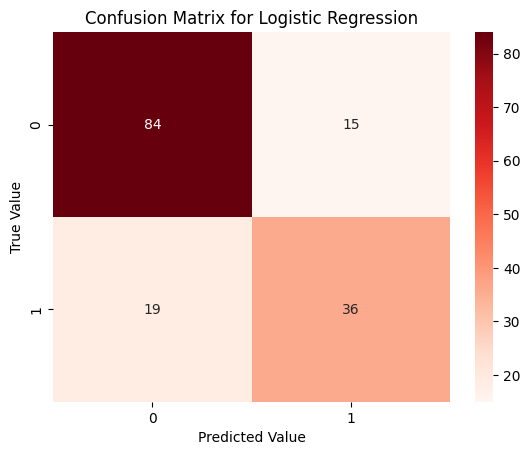

In [80]:
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

The diagonal boxes shows the count of true positives for each class. The predicted value is given on top while the actual value is given on the left side. The off-diagonal boxes shows the count of false positives.

Text(0, 0.5, 'Count')

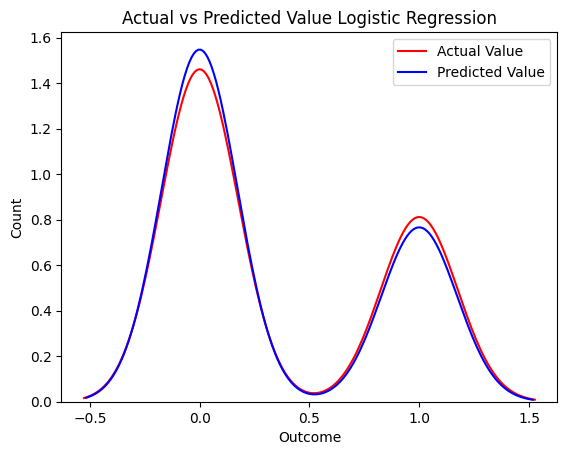

In [82]:
#Distribution plot

ax = sns.distplot(Y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(Y_pred_lr, color='b', label='Predicted Value',hist=False,ax=ax)
plt.title('Actual vs Predicted Value Logistic Regression')
plt.legend()
plt.xlabel('Outcome')
plt.ylabel('Count')

**Classificaion Report**

In [85]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



The model has as an average f1 score of 0.755 and acuuracy of 78%.

In [86]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred_lr))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred_lr)))
print('R2 Score:', r2_score(Y_test, Y_pred_lr))

Mean Absolute Error: 0.22077922077922077
Mean Squared Error: 0.22077922077922077
Root Mean Squared Error: 0.4698714938993648
R2 Score: 0.038383838383838076


**Decision Tree**

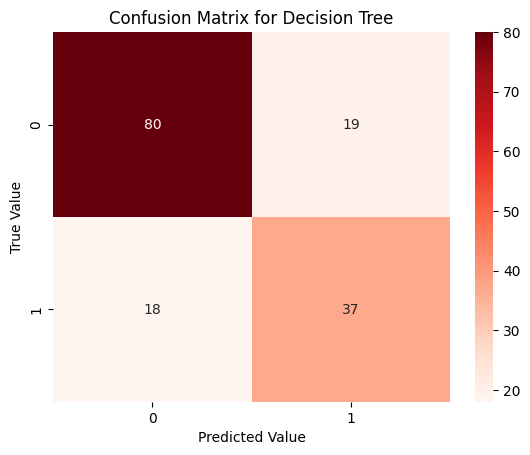

In [87]:
sns.heatmap(cm_decitree, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

Text(0, 0.5, 'Count')

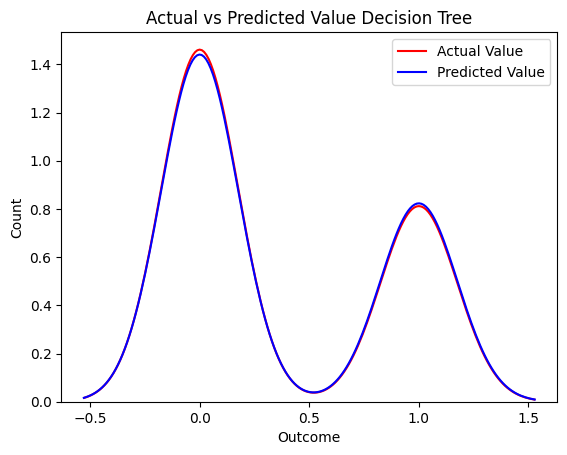

In [88]:
ax1 = sns.distplot(Y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(Y_pred_decitree, color='b', label='Predicted Value',hist=False,ax=ax1)
plt.title('Actual vs Predicted Value Decision Tree')
plt.legend()
plt.xlabel('Outcome')
plt.ylabel('Count')

In [90]:
print(classification_report(Y_test, Y_pred_decitree))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



The model has as an average f1 score of 0.745 and acuuracy of 77% which less in comparison to Logistic Regression model.

In [91]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred_decitree))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred_decitree))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred_decitree)))
print('R2 Score:', r2_score(Y_test, Y_pred_decitree))

Mean Absolute Error: 0.24025974025974026
Mean Squared Error: 0.24025974025974026
Root Mean Squared Error: 0.4901629731627434
R2 Score: -0.046464646464646764


**KNN**

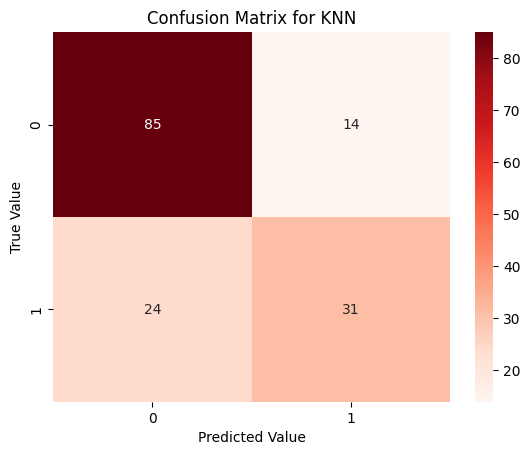

In [92]:
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

Text(0, 0.5, 'Count')

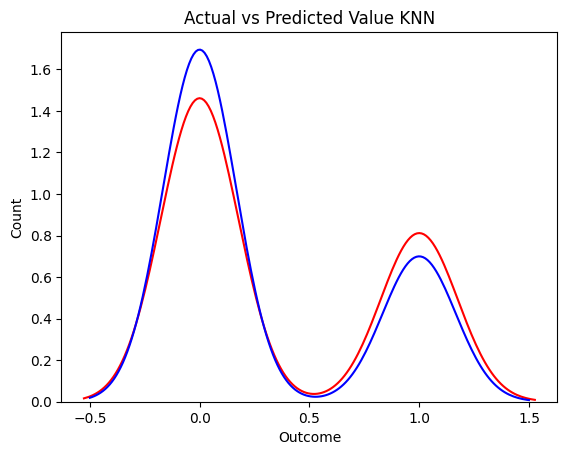

In [95]:
ax2 = sns.distplot(Y_test, color='r',  label='Actual Value',hist=False)
sns.distplot(Y_pred_knn, color='b', label='Predicted Value',hist=False,ax=ax2)
plt.title('Actual vs Predicted Value KNN')
plt.xlabel('Outcome')
plt.ylabel('Count')

These distribution plot clearly visualizes the accuracy of the model. The red color represents the actual values and the blue color represents the predicted values. The more the overlapping of the two colors, the more accurate the model is.

In [96]:
#Classification report

print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        99
           1       0.69      0.56      0.62        55

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



The model has as an average f1 score of 0.72 and acuuracy of 75% which is equivalent to previous model.

In [97]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred_knn))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred_knn)))
print('R2 Score:', r2_score(Y_test, Y_pred_knn))

Mean Absolute Error: 0.24675324675324675
Mean Squared Error: 0.24675324675324675
Root Mean Squared Error: 0.496742636335202
R2 Score: -0.074747474747475


In [98]:
variables = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in variables:
    data[i].replace(0, data[i].mean(), inplace=True)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'], test_size=0.2, random_state=42)

# Train a logistic regression model (replace with your preferred model)
lr = LogisticRegression()
lr.fit(X_train, Y_train)

def predict_diabetes():
  pregnancies = float(input("Enter the number of pregnancies: "))
  glucose = float(input("Enter the glucose level: "))
  blood_pressure = float(input("Enter the blood pressure: "))
  skin_thickness = float(input("Enter the skin thickness: "))
  insulin = float(input("Enter the insulin level: "))
  bmi = float(input("Enter the BMI: "))
  dpf = float(input("Enter the Diabetes Pedigree Function: "))
  age = float(input("Enter the age: "))

  # Create a NumPy array with the user's input
  user_input = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]])

  # Make a prediction using the trained model
  prediction = lr.predict(user_input)[0]

  if prediction == 1:
    print("Prediction: Diabetic")
  else:
    print("Prediction: Not Diabetic")

# Example usage
predict_diabetes()

Enter the number of pregnancies: 2
Enter the glucose level: 111
Enter the blood pressure: 45
Enter the skin thickness: 22
Enter the insulin level: 300
Enter the BMI: 60
Enter the Diabetes Pedigree Function: 45
Enter the age: 21
Prediction: Diabetic
